In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate 
import pylab as py
import scipy as sp
from scipy.interpolate import interp1d

In [17]:
x = np.r_[0:10:11j]
y = np.sin(x)

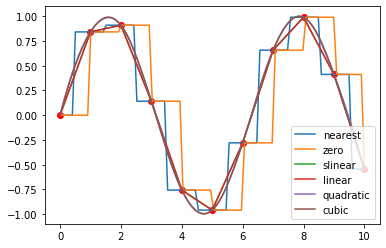

In [20]:
xnew=np.r_[0:10:100j]

py.figure(1)
py.clf()
py.plot(x,y,'ro')

for kind in ['nearest','zero','slinear','linear','quadratic','cubic']:
    f = interpolate.interp1d(x,y,kind=kind)
    ynew = f(xnew)
    py.plot(xnew,ynew,label=kind)

py.legend(loc='lower right')


In [28]:
def func(x):
    return(np.sin(x))
    #return(x*np.exp(-5.0*x**2))

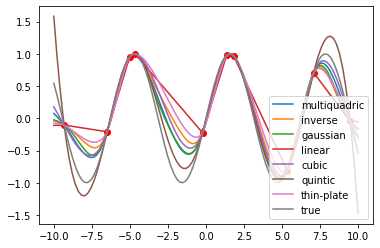

In [35]:
x = np.random.uniform(-10.0,10.0,size=10)
fvals = func(x)
py.figure(1)
py.clf()
py.plot(x,fvals,'ro')
xnew = np.linspace(-10,10,100)

values = ['multiquadric','inverse','gaussian','linear','cubic','quintic','thin-plate']

for kind in values:
    newfunc = interpolate.Rbf(x,fvals,function=kind)
    fnew = newfunc(xnew)
    py.plot(xnew,fnew,label=kind)

py.plot(xnew,func(xnew),label='true')
py.legend(loc='lower right')

In [42]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [45]:
# 2-d tests - setup scattered data
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
ti = np.linspace(-2.0, 2.0, 100)
XI, YI = np.meshgrid(ti, ti)


In [46]:
# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(XI, YI)

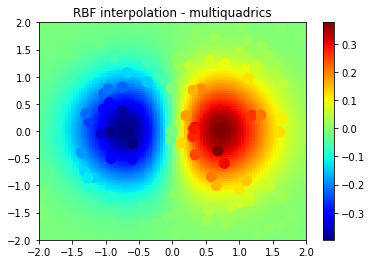

In [47]:
# plot the result
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()

### 1D interpolation example

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from RBFN import*

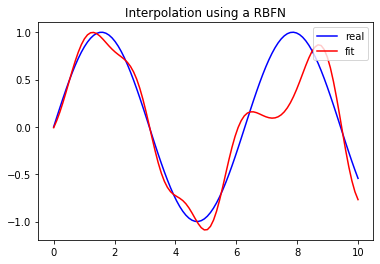

In [3]:
# generating data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# fitting RBF-Network with data
model = RBFN(hidden_shape=10, sigma=1.)
model.fit(x, y)
y_pred = model.predict(x)

# plotting 1D interpolation
plt.plot(x, y, 'b-', label='real')
plt.plot(x, y_pred, 'r-', label='fit')
plt.legend(loc='upper right')
plt.title('Interpolation using a RBFN')
plt.show()

### 2D interpolation example

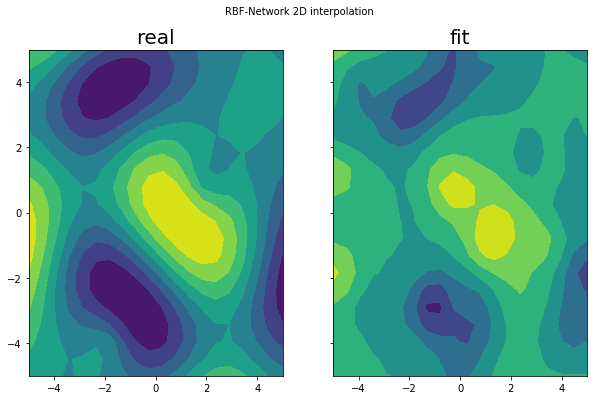

In [4]:
# generating dummy data for interpolation
x, y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
z = (np.sin(np.sqrt((x - 2.)**2 + (y - 1)**2)) -
     np.sin(np.sqrt((x + 2.)**2 + (y + 4)**2))) / 2.

# fitting RBF-Network with data
features = np.asarray(list(zip(x.flatten(), y.flatten())))
model = RBFN(hidden_shape=70, sigma=1.)
model.fit(features, z.flatten())
predictions = model.predict(features)

# plotting 2D interpolation
figure, (axis_left, axis_right) = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
figure.suptitle('RBF-Network 2D interpolation', fontsize=10)
axis_right.set_title('fit', fontsize=20)
axis_left.set_title('real', fontsize=20)
axis_left.contourf(x, y, z)
right_image = axis_right.contourf(x, y, predictions.reshape(20, 20))
plt.show()